In [19]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import baostock as bs
from datetime import datetime, timedelta
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
lg = bs.login()

login success!


In [15]:
datetime.now().strftime('%Y-%M-%d')

'2018-10-03'

In [21]:
dt = datetime(2016,7,18, 2, 55)
print(dt - timedelta(days=5))

2016-07-13 02:55:00


In [114]:
rs_days = bs.query_history_k_data("sh.600036",
    "date,open,close,high,low,volume,amount,turn",
    start_date='2018-07-28', end_date='2018-09-28',frequency="d")

In [115]:
data_days = rs_days.get_data()
data_days['ma3'] = np.round(pd.Series.rolling(data_days['close'], 3).mean(), 2)
data_days['ma5'] = np.round(pd.Series.rolling(data_days['close'], 5).mean(), 2)
data_days['ma3-ma5'] = data_days['ma3'] - data_days['ma5']

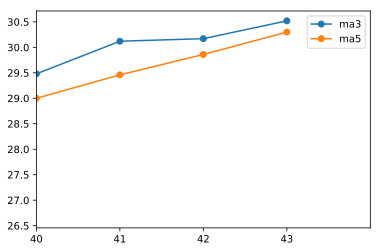

In [124]:
data_days[['ma3', 'ma5']].plot(marker='o',xticks=[40, 41, 42, 43],xlim=(40,44))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x110fbd748>],
      dtype=object)

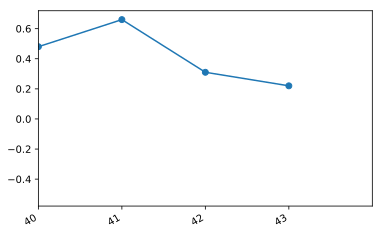

In [125]:
data_days['ma3-ma5'].plot(subplots=True, marker='o',xticks=[40, 41, 42, 43],xlim=(40,44))

In [56]:
# 策略： 以当日收盘价计算，如果ma3_price > ma5_price，则次日以开盘价买入；如果ma3_price < ma5_price，则次日以开盘价卖出。
# 以2016-09-28日起始，从2016-10-11开始计算，每次只交易100股，按5元一次计算手续费。
signals=[]
isBuy=False
dateBuy=''
priceBuy=0
isSell=False
dateSell=''
priceSell=0
profitTotal=0
feeTotal=0
assets=0
i=0
for index in data_days['ma5'].index:
    signal = 1 # 买入
    if data_days['ma3'][index] > data_days['ma5'][index]:
        signal = 1
    else:
        signal = 0
    
    signals.append(signal)
    #print("%s, open %s, close %s, %s" % (data_days['date'][index], data_days['open'][index], data_days['close'][index], signal))
    if i > 3:
        # if isBuy:
        #     print('buy')
        #     
        # if isSell:
        #     prict('sell')
            
        if signals[i] > signals[i-1]:
            isBuy = True
            feeTotal += 5
            dateBuy = data_days['date'][index]
            priceBuy = float(data_days['close'][index])
            assets = priceBuy * 100
            #print(index, 'buy price %s' % priceBuy)
        
        if signals[i] < signals[i-1]:
            isSell = True
            feeTotal += 5
            dateSell = data_days['date'][index]
            priceSell = float(data_days['close'][index])
            profit = priceSell*100 - assets - 10
            profitTotal += profit
            assets = 0
            print("buy price %.2f on %s, sell price %.2f on %s, profit %d, total profit %d" % 
                  (priceBuy, dateBuy, priceSell, dateSell ,profit, profitTotal))

    i+=1

buy price 18.33 on 2016-10-11, sell price 18.10 on 2016-10-14, profit -32, total profit -32
buy price 18.31 on 2016-10-24, sell price 17.81 on 2016-10-27, profit -60, total profit -92
buy price 17.98 on 2016-11-01, sell price 17.91 on 2016-11-04, profit -17, total profit -109
buy price 17.99 on 2016-11-08, sell price 17.89 on 2016-11-09, profit -19, total profit -129
buy price 18.00 on 2016-11-10, sell price 18.10 on 2016-11-18, profit 0, total profit -129
buy price 18.34 on 2016-11-21, sell price 18.55 on 2016-11-30, profit 11, total profit -118
buy price 18.60 on 2016-12-06, sell price 18.82 on 2016-12-14, profit 11, total profit -106
buy price 17.62 on 2016-12-28, sell price 17.49 on 2016-12-29, profit -23, total profit -129
buy price 18.02 on 2017-01-04, sell price 17.94 on 2017-01-09, profit -17, total profit -147
buy price 18.00 on 2017-01-12, sell price 18.62 on 2017-02-06, profit 52, total profit -95
buy price 18.90 on 2017-02-10, sell price 19.43 on 2017-02-24, profit 43, tota

In [66]:
date='2016-07-18'
rs_5min = bs.query_history_k_data("sh.600036",
    "date,time,open,close,high,low,volume,amount",
    start_date=date, end_date=date,frequency="5")
data_5min = rs_5min.get_data()
data_5min['open'] = pd.to_numeric(data_5min['open'], downcast='float')

In [77]:
data_5min['time']

0     20160718093500000
1     20160718094000000
2     20160718094500000
3     20160718095000000
4     20160718095500000
5     20160718100000000
6     20160718100500000
7     20160718101000000
8     20160718101500000
9     20160718102000000
10    20160718102500000
11    20160718103000000
12    20160718103500000
13    20160718104000000
14    20160718104500000
15    20160718105000000
16    20160718105500000
17    20160718110000000
18    20160718110500000
19    20160718111000000
20    20160718111500000
21    20160718112000000
22    20160718112500000
23    20160718113000000
24    20160718130500000
25    20160718131000000
26    20160718131500000
27    20160718132000000
28    20160718132500000
29    20160718133000000
30    20160718133500000
31    20160718134000000
32    20160718134500000
33    20160718135000000
34    20160718135500000
35    20160718140000000
36    20160718140500000
37    20160718141000000
38    20160718141500000
39    20160718142000000
40    20160718142500000
41    2016071814

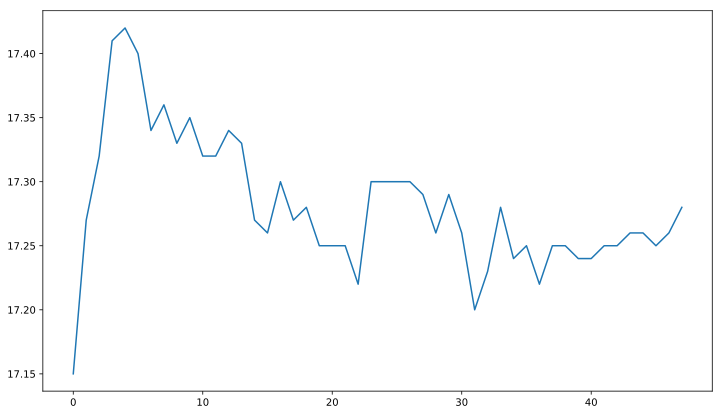

In [100]:
index = pd.Index
index.data = data_5min['time']
plot_5min = data_5min['open'].plot(figsize=(12, 7))

In [96]:
index

pandas.core.indexes.base.Index

In [97]:
index.data

0     20160718093500000
1     20160718094000000
2     20160718094500000
3     20160718095000000
4     20160718095500000
5     20160718100000000
6     20160718100500000
7     20160718101000000
8     20160718101500000
9     20160718102000000
10    20160718102500000
11    20160718103000000
12    20160718103500000
13    20160718104000000
14    20160718104500000
15    20160718105000000
16    20160718105500000
17    20160718110000000
18    20160718110500000
19    20160718111000000
20    20160718111500000
21    20160718112000000
22    20160718112500000
23    20160718113000000
24    20160718130500000
25    20160718131000000
26    20160718131500000
27    20160718132000000
28    20160718132500000
29    20160718133000000
30    20160718133500000
31    20160718134000000
32    20160718134500000
33    20160718135000000
34    20160718135500000
35    20160718140000000
36    20160718140500000
37    20160718141000000
38    20160718141500000
39    20160718142000000
40    20160718142500000
41    2016071814